# wa - king ilçesi ev fiyatları

In [82]:
#visual studiodan commit ve push denemesi

import pandas as pd
pd.set_option("display.max_columns", 100)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
abs(df.corr(numeric_only = True) ['price'].sort_values(ascending = False)) # sadece 0.20 0.90 arasındakileri alıyruz

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id               0.016762
zipcode          0.053203
Name: price, dtype: float64

In [5]:
print(df['bedrooms'].isnull().sum())
print(df['bathrooms'].isnull().sum())

0
0


In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## EDA

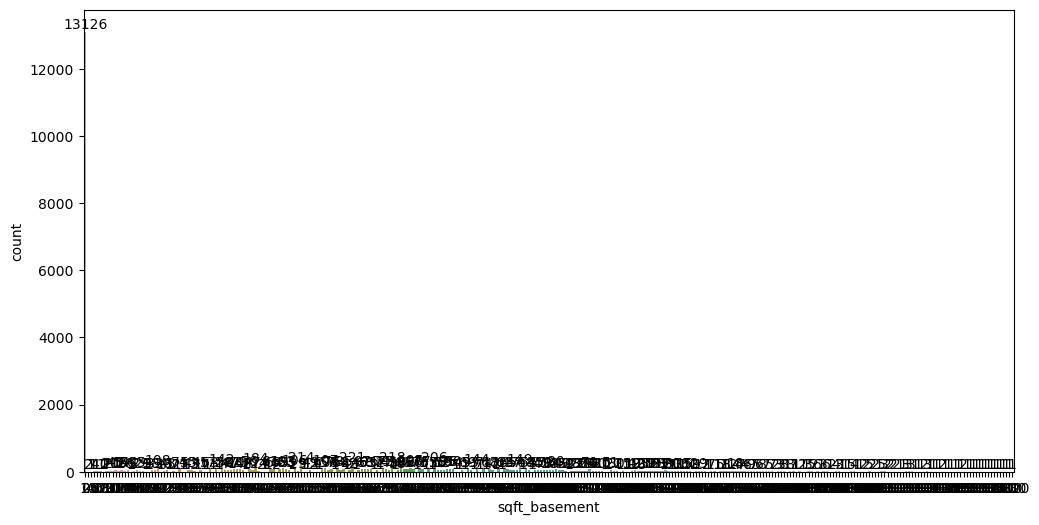

In [7]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x = df['sqft_basement']);
ax.bar_label(ax.containers[0]);

In [9]:
df.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7259,6450300605,20150501T000000,410000.0,3,2.0,1750,2550,1.0,0,0,3,7,1750,0,1955,0,98133,47.7329,-122.343,1370,1533
2262,8035350260,20141009T000000,455000.0,5,3.5,3080,7759,2.0,0,0,3,8,2310,770,2003,0,98019,47.7454,-121.977,2980,8223
15555,1922059298,20150414T000000,175000.0,3,1.0,1460,11880,1.0,0,0,2,7,1460,0,1961,0,98030,47.3762,-122.219,1310,9315


In [11]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [12]:
df.shape

(21613, 21)

In [37]:
abs(df.corr(numeric_only = True) ['price'].sort_values(ascending = False)) # sadece 0.20 0.90 arasındakileri alıyruz

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id               0.016762
zipcode          0.053203
Name: price, dtype: float64

In [14]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


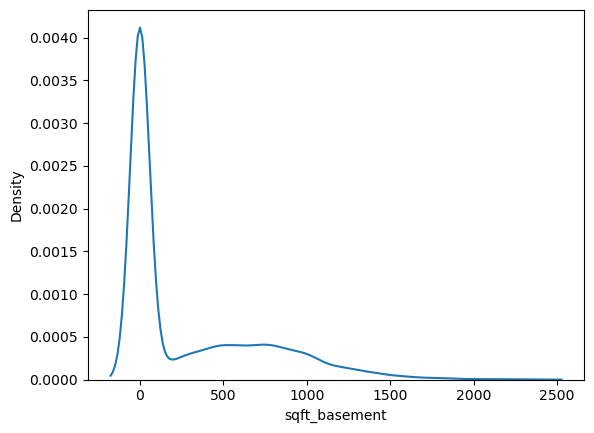

In [69]:
sns.kdeplot(x = df['sqft_basement']);

In [43]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [71]:
df["sqft_living15"].mean() + 3*df["sqft_living15"].std()

3775.0399224033877

In [72]:
df["sqft_living15"].mean() - 3*df["sqft_living15"].std()

100.61797761668868

In [84]:
df['age'] = 2024 - df['yr_built']

In [85]:
df['zipcode'] = df['zipcode'].astype('category')

In [86]:
df = df[df['bedrooms'] < 7]

In [87]:
df = df[df['bathrooms'] < 5]

In [88]:
df = df[df['grade']>4]

In [89]:
df = df[df['grade']<11]

In [90]:
df = df[df['floors'] < 2.5]

In [91]:
df = df[df['sqft_above'] < 4000]

In [92]:
df = df[df['sqft_basement'] < 1600]

In [93]:
df = df[df['sqft_living15'] < 4000]

In [97]:
df = df[df['sqft_living'] < 5000]

In [98]:
df['renovated'] = df['yr_renovated'] != 0
df['renovated'] = df['renovated'].astype(int)

In [99]:
df['overall_condition_view'] = df['condition'] * df['view']  # Genel durum ve manzara puanı
df['above_vs_living'] = df['sqft_above'] - df['sqft_living']  # Yerüstü alan ve yaşam alanı farkı
df['total_area'] = df['sqft_living'] + df['sqft_basement'] 
df['high_quality_area'] = df['sqft_living'] * df['grade']  # Yüksek kaliteli alan
df['avg_room_size'] = df['sqft_living'] / (df['bedrooms'].replace(0, 1))
df['bathrooms_per_bedroom'] = df['bathrooms'] / (df['bedrooms'].replace(0, 1))
df['young_and_good'] = df['grade'] / (df['age'])



In [102]:
df['waterfront'] = df['waterfront'].astype(int)

In [ ]:
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age,renovated
id,1.000000,-0.014148,0.004600,0.011299,-0.006900,-0.131906,0.020390,-0.000631,0.014057,-0.024365,0.013862,-0.005507,-0.003687,0.023712,-0.017241,-0.001505,0.022013,0.000522,-0.140802,-0.023712,-0.017282
price,-0.014148,1.000000,0.310882,0.497211,0.670280,0.074944,0.260334,0.242462,0.385761,0.049496,0.657849,0.569300,0.295897,0.039128,0.132162,0.335649,0.017428,0.586528,0.066938,-0.039128,0.131786
bedrooms,0.004600,0.310882,1.000000,0.516642,0.597760,0.028356,0.174063,-0.012414,0.071417,0.026094,0.354301,0.487074,0.301293,0.156727,0.016007,-0.014794,0.136460,0.400070,0.025308,-0.156727,0.015708
bathrooms,0.011299,0.497211,0.516642,1.000000,0.739968,0.070419,0.506137,0.048762,0.163742,-0.124864,0.650868,0.664916,0.260607,0.514890,0.048094,0.019349,0.227546,0.558479,0.069653,-0.514890,0.047594
sqft_living,-0.006900,0.670280,0.597760,0.739968,1.000000,0.155725,0.354672,0.079199,0.256455,-0.056076,0.748511,0.864793,0.413442,0.323085,0.052477,0.047217,0.248227,0.757550,0.167836,-0.323085,0.052196
sqft_lot,-0.131906,0.074944,0.028356,0.070419,0.155725,1.000000,-0.011864,0.021597,0.068351,-0.005633,0.099278,0.165611,0.008276,0.047483,0.008625,-0.090186,0.225831,0.140515,0.707071,-0.047483,0.008730
floors,0.020390,0.260334,0.174063,0.506137,0.354672,-0.011864,1.000000,0.020266,0.021181,-0.265267,0.461167,0.532253,-0.262336,0.490008,0.006007,0.046929,0.126465,0.275915,-0.019202,-0.490008,0.005926
waterfront,-0.000631,0.242462,-0.012414,0.048762,0.079199,0.021597,0.020266,1.000000,0.393072,0.019131,0.062988,0.052701,0.061375,-0.032442,0.091492,-0.017230,-0.043543,0.075948,0.029875,0.032442,0.091942
view,0.014057,0.385761,0.071417,0.163742,0.256455,0.068351,0.021181,0.393072,1.000000,0.049844,0.226374,0.137849,0.258224,-0.063711,0.103683,0.002411,-0.084382,0.262693,0.063234,0.063711,0.103833
condition,-0.024365,0.049496,0.026094,-0.124864,-0.056076,-0.005633,-0.265267,0.019131,0.049844,1.000000,-0.148541,-0.160722,0.180322,-0.360887,-0.062702,-0.015363,-0.104923,-0.091159,-0.000448,0.360887,-0.062226


In [ ]:
abs(df.corr(numeric_only = True) ['price'].sort_values(ascending = False)) # sadece 0.20 0.90 arasındakileri alıyruz

price                     1.000000
high_quality_area         0.680690
grade                     0.646874
total_area                0.633399
sqft_living               0.629687
sqft_above                0.610286
sqft_living15             0.575349
avg_room_size             0.514846
bathrooms                 0.450472
lat                       0.383790
floors                    0.334599
bedrooms                  0.316465
view                      0.250634
overall_condition_view    0.246874
bathrooms_per_bedroom     0.223802
waterfront                0.166057
yr_built                  0.112664
sqft_lot                  0.095792
long                      0.090174
sqft_lot15                0.089653
yr_renovated              0.086627
renovated                 0.086325
sqft_basement             0.019137
id                        0.008774
condition                 0.017413
above_vs_living           0.019137
age                       0.112664
young_and_good            0.217643
Name: price, dtype: 

In [ ]:
df.corr(numeric_only = True) ['price'].sort_values(ascending = False) # sadece 0.20 0.90 arasındakileri alıyruz

price            1.000000
sqft_living      0.670280
grade            0.657849
sqft_living15    0.586528
sqft_above       0.569300
bathrooms        0.497211
view             0.385761
lat              0.335649
bedrooms         0.310882
sqft_basement    0.295897
floors           0.260334
waterfront       0.242462
yr_renovated     0.132162
renovated        0.131786
sqft_lot         0.074944
sqft_lot15       0.066938
condition        0.049496
yr_built         0.039128
long             0.017428
id              -0.014148
age             -0.039128
Name: price, dtype: float64

In [103]:
x = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
        'view', 'sqft_basement', 'bedrooms', 'lat', 'floors','waterfront',
        'age','renovated', 'zipcode','bathrooms_per_bedroom','avg_room_size','high_quality_area','total_area','above_vs_living'
        ,'overall_condition_view','young_and_good']] # age and condition is domain info
y= df[['price']]

In [76]:
x = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
        'view', 'sqft_basement', 'bedrooms', 'lat', 'floors','waterfront',
        'age', 'zipcode',"renovated"]] # age is domain info
y= df[['price']]

In [104]:
lr = LinearRegression()
R = Ridge()
L = Lasso()
E = ElasticNet()

In [105]:
x = pd.get_dummies(x, drop_first=True)

In [106]:
def model_fit(x,y, model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    ml = model.fit(x_train, y_train)
    y_pred = ml.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

In [107]:
model_fit(x,y,lr)

(115988.5692606468, 0.8067464531221831)

<Axes: >

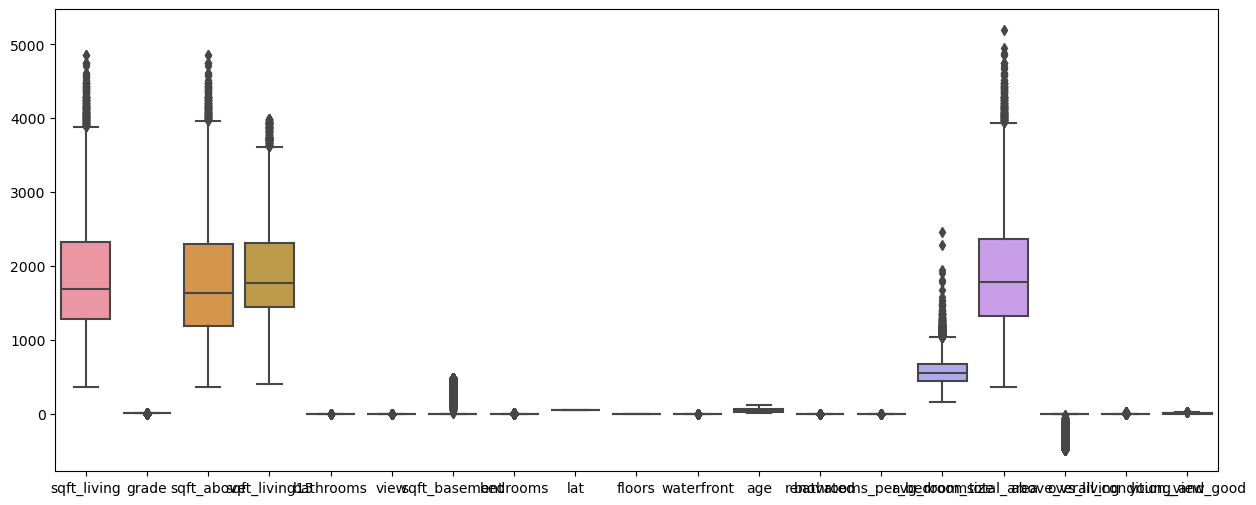

In [ ]:
plt.figure(figsize=(15, 6)) 
sns.boxplot(df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
        'view', 'sqft_basement', 'bedrooms', 'lat', 'floors','waterfront',
        'age','renovated', 'zipcode','bathrooms_per_bedroom','avg_room_size','total_area','above_vs_living','overall_condition_view','young_and_good']])